In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [2]:
pwd

'C:\\Users\\sumit\\Downloads\\Re Logistic Regression and SVM'

In [3]:
demodata = pd.read_csv('svmdemo.csv')

In [4]:
demodata

,Class,X1,X2
0,-1,1.00,1.00
1,-1,-1.00,1.00
2,-1,1.00,-1.00
3,-1,-1.00,-1.00
4,-1,0.00,0.00
5,-1,1.25,-1.30
6,-1,-1.30,1.25
7,-1,-1.30,-1.30
8,-1,-1.40,1.10
9,-1,1.40,1.10


In [5]:
import matplotlib.pyplot as plt

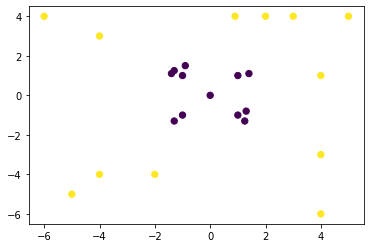

In [6]:
X = np.array(demodata)
plt.scatter(X[:,1], X[:,2], c=X[:,0], s=40, cmap='viridis')
plt.show()

In [29]:
model = LogisticRegression()
#model = SVC(kernel = 'linear')
#model = SVC(kernel = 'poly',degree = 2)
#model = SVC(kernel = 'poly', degree = 2, C = 100000)
#model = SVC()

In [35]:
?SVC

In [31]:
X = demodata.drop('Class',axis = 1)
Y = demodata['Class']

In [23]:
X

,X1,X2
0,1.00,1.00
1,-1.00,1.00
2,1.00,-1.00
3,-1.00,-1.00
4,0.00,0.00
5,1.25,-1.30
6,-1.30,1.25
7,-1.30,-1.30
8,-1.40,1.10
9,1.40,1.10


In [32]:
model.fit(X,Y)

LogisticRegression()

In [33]:
pred = model.predict(X)

In [34]:
confusion_matrix(pred,Y)

array([[7, 5],
       [5, 7]], dtype=int64)

In [27]:
model.support_vectors_ 

array([[ 1.  ,  1.  ],
       [ 1.25, -1.3 ],
       [-1.3 ,  1.25],
       [-1.3 , -1.3 ],
       [ 1.4 ,  1.1 ],
       [-0.9 ,  1.5 ],
       [-4.  ,  3.  ],
       [ 4.  , -3.  ],
       [ 4.  ,  1.  ],
       [ 0.9 ,  4.  ],
       [ 2.  ,  4.  ],
       [-2.  , -4.  ]])

In [28]:
?model